### The first problem 

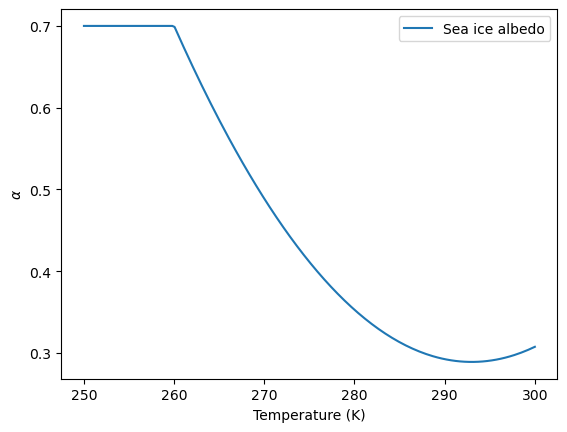

In [34]:
# As usual, we start with some import statements.
import numpy as np
import matplotlib.pyplot as plt
import climlab  # import climlab just like any other package

a = np.zeros(200)
# Define a function to describe the formula
def temp_albedo(T):
    if T<=260:
        alpha = 0.7
        return alpha
    elif (T>260)|(T<293):
        alpha = 0.289 + (0.7 - 0.289) * ((T - 293) **2 / (260 - 293) **2)
        return alpha
    elif T>=293:
        alpha = 0.289
        return alpha

# Set up a wide range of planetary temperature with step = 0.5
flg = 0

for T_planet in np.linspace(250, 300, 200):
    a[flg] = temp_albedo(T_planet)
    flg = flg + 1

plt.plot(np.linspace(250, 300, 200), a, label='Sea ice albedo')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$\alpha$')
plt.legend()

### The second problem

In [36]:
#  As usual, we start with some import statements.
import numpy as np
import matplotlib.pyplot as plt
import climlab  # Import climlab just like any other package

# Create a zero-dimensional domain with a single surface temperature
state = climlab.surface_state(num_lat=1,  # A single point
                              water_depth = 100.,  # 100 meters slab of water (sets the heat capacity)
                             )

delta_t = 60. * 60. * 24. * 10  # 10 days 
state.Ts[:] = 288-273. # Convert inital K to C  
albedo_initial = temp_albedo(288.) # Calculate the initial albedo according the function defined as above

In [37]:
# Create the longwave radiation process
olr = climlab.radiation.Boltzmann(name='OutgoingLongwave',
                                  state=state, 
                                  tau = 0.57,
                                  eps = 1.,
                                  timestep = delta_t)

asr = climlab.radiation.SimpleAbsorbedShortwave(name='AbsorbedShortwave',
                                                state=state, 
                                                insolation=341.3, 
                                                albedo = 0.298, # Use temperature dependent albedo defined as above
                                                timestep = delta_t)


In [38]:
#  couple them together into a single model
ebm = climlab.couple([olr,asr])
#  Give the parent process name
ebm.name = 'EnergyBalanceModel'

In [39]:
num_steps = 1800 # total 50years, one step presents about 10days
Tarray = np.zeros(num_steps)

for n in range(num_steps):
    ebm.step_forward()
    Tarray[n] = ebm.Ts
    ebm.subprocess['AbsorbedShortwave'].albedo = temp_albedo(ebm.Ts+273)
    # print(ebm.subprocess['AbsorbedShortwave'].albedo)

In [40]:
# Reproduce the case we did in class
ebm2 = climlab.process_like(ebm)

ebm2.subprocess['AbsorbedShortwave'].albedo = 0.32 #Same as the case we did in class
ebm2.state.Ts[:] = 32 #Same as the case we did in class
num_steps = 1800 # 10 days one step, total 49.31 years
Tarray1 = np.zeros(num_steps)

for n in range(num_steps):
    ebm2.step_forward()
    Tarray1[n] = ebm2.Ts


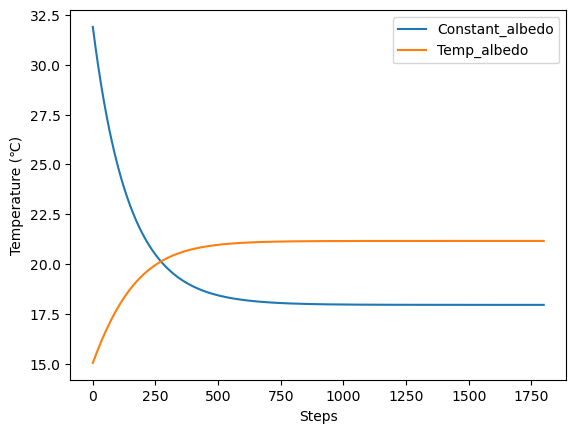

In [42]:
plt.plot(Tarray1, label = 'Constant_albedo')
plt.plot(Tarray, label = 'Temp_albedo')
plt.xlabel('Steps')
plt.ylabel('Temperature (℃)')
plt.legend()